# Practice Session AI: Data Science

In [2]:
# vul in

print("Naam:", "Van Kampen")
print("Voornaam:", "Tijs")
print("R-nummer:", "r0785695")
print("Richting:", "IIW E-ICT")

# druk <ctrl> + <enter>


Naam: Van Kampen
Voornaam: Tijs
R-nummer: r0785695
Richting: IIW E-ICT


Welkom bij de eerste labosessie van Artificiële Intelligentie! In deze sessie maken we kennis met enkele belangrijke concepten uit de *Data Science*, het onderzoeksveld dat de kracht van statistiek, algebra en computerwetenschappen combineert en deze afvuurt op data. In de laatste 10-15 jaar heeft deze branche enorm aan belang gewonnen door de exponentieel stijgende groei van het internet, de dalende prijs van opslagruimte en de opkomende wensen van de bedrijfswereld om *Big Data* te gebruiken als leiddraad voor belangrijke beslissingen.

Dit document is een zogenaamde ``IPython Notebook``. Een notebook bevat een mix van pure tekst en uitvoerbare code, en is uitermate geschikt om op een esthetisch verantwoorde manier rekenresultaten numerisch en grafisch voor te stellen. De code in de blokken kan uitgevoerd worden met het toetsencommando ``<control> + <enter>`` of ``<shift> + <enter>``. Als er iets misgelopen is (bvb. datacorruptie, variabele overschreven, ...) kan de notebook opnieuw opgestart en uitgevoerd worden door op &#9193; te klikken.

Sommige codeblokken zijn op voorhand al ingevuld, maar de meeste zijn nog leeg. De bedoeling is dat we deze in dit labo gaan invullen op basis van de opdracht in het voorgaande groene tekstblok. **Letop:** soms wordt er niet enkel gevraagd naar code, maar ook naar wat tekstuele uitleg. Vergeet deze vragen niet te op te lossen! Deze antwoorden mogen gewoon toegevoegd worden aan het codeblok m.b.v. een ``print()``.

In de notebook komen een aantal libraries aan bod die geen deel uitmaken van de *Python standard library* en zijn dus misschien vrij onbekend. In de tekst staan vaak verwijzingen naar de online documentatie van deze libraries, en het is ten sterkste aanbevolen om deze dan ook te gebruiken.

De bedoeling van deze notebook is om aan de hand van een dataset van informatie over wijnen interessante dingen te doen, zoals het voorspellen van de zuurtegraad van een wijn! Boeiend!

Veel succes!

## Data Acquisition

De eerste stap in het proces bestaat uiteraard uit het verzamelen van gegevens die onderzocht kunnen worden. De wijzes waarop dit kan gebeuren zijn zeer divers en afhankelijk van de use case. Enkele voorbeelden:

* database queries (SQL) op vooraf verzamelde grote databestanden
* uitlezen van analoge of digitale sensorwaarden
* informatie van websites halen via web scraping of API querying
* resultaten van labo-experimenten manueel omzetten naar tabelformaat (vb. Excel)
* ...

In dit labo houden we ons met deze stap niet bezig en wordt er een kant en klare [dataset](https://archive.ics.uci.edu/ml/datasets/wine) in CSV-formaat ter beschikking gesteld. Deze bevat een reeks chemische en fysische gegevens over wijnen gemaakt van drie verschillende druivensoorten (ook wel *cultivars* genoemd). De namen van deze eigenschappen zijn bekend, de eenheden waarin ze uitgedrukt zijn niet. 

Bij de kolommen van de tabel kan er een onderscheid gemaakt worden tussen *features* (soms ook wel "onafhankelijke variabelen" genoemd) en *target* ("afhankelijke variabele"). De eigenschappen die in de *feature*-kolommen staan zullen worden gebruikt om een voorspelling te doen over de aard van de *target*.

### Loading Imports
Voordat we beginnen, importeren we enkele packages waarmee we gaan werken.

In [3]:
# imports

# numerical tools
import numpy as np
import pandas as pd

# plotting tools
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

# machine learning tools
import sklearn
import pandas_ml as pdml

# notebook initialisation
%matplotlib inline

* **NumPy**: Library voor (vooral algebraïsche) wiskundige berekeningen. Zeer efficiënt in het uitvoeren van vectoriële bewerkingen.
* **Pandas**: Package om tabulaire data voor te stellen in de vorm van een ``DataFrame`` of een ``Series``.
* **MatPlotLib**: Plotting toolkit voor Python, API is sterk gebaseerd op die van MATLAB.
* **Seaborn**: Uitbreiding op MatPlotLib.
* **GraphViz**: Toolkit om grafen en boomvormige datastructuren te tekenen.
* **Scikit-Learn**: *All-inclusive* machine learning library voor Python. Zeer uitgebreid: bevat het merendeel van de courante classificatie-, regressie- en clusteralgoritmes (met uitzondering van boosted trees en DNNs).
* **Pandas-ML**: Wrapper om Pandas en Scikit-Learn te linken.

### Loading the Dataset

[**Pandas**](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html) (``pd``) is de bibliotheek waarmee we de data gaan voorstellen. Het basisobject van deze package is de ``Series``, een kolom van datapunten die allemaal hetzelfde type (``dtype``) hebben, zoals ``int``, ``float`` en ``object`` (meestal strings). Wanneer meerdere van deze ``Series`` samen gegroepeerd worden, spreken we van een ``DataFrame``.

Het inlezen van de dataset kan best gedaan worden met de ``pd.read_csv()`` functie, die een ``DataFrame`` teruggeeft; lees de online documentatie voor meer info. 

De namen die bij de kolommen horen zijn als volgt: 
``'type', 'alcohol', 'malic_acid', 'ash', 'alkalinity', 'magnesium', 'total_phenols', 'flavonoids', 'nonflavonoid_phenols', 'proanthocyanins', 'color_intensity', 'color_hue', 'OD280/OD315', 'proline'``.

<div class="alert alert-block alert-success">
Lees de data uit het bestand ``data/wine.csv`` in in een ``DataFrame``, en geef de kolommen de juiste namen. Noem deze variabele ``df``.

In [4]:
df = pd.read_csv("data/wine.csv")

<div class="alert alert-block alert-success">
Controleer of het verkegen dataframe op een juiste manier werd ingeladen met de ``DataFrame.head()`` methode.
    
Print vervolgens ook eens de volledige dataframe uit (met `print()`) en kijk of er in totaal 178 rijen zijn.

In [5]:
df.columns = ['type', 'alcohol', 'malic_acid', 'ash', 'alkalinity', 'magnesium', 'total_phenols', 'flavonoids', 'nonflavonoid_phenols', 'proanthocyanins', 'color_intensity', 'color_hue', 'OD280/OD315', 'proline']
df.head()
#print(df)

type  alcohol  malic_acid   ash  alkalinity  magnesium  total_phenols  \
0  Trebbiano    13.20        1.78  2.14        11.2        100           2.65   
1  Trebbiano    13.16        2.36  2.67        18.6        101           2.80   
2  Trebbiano    14.37        1.95  2.50        16.8        113           3.85   
3  Trebbiano    13.24        2.59  2.87        21.0        118           2.80   
4  Trebbiano    14.20        1.76  2.45        15.2        112           3.27   

   flavonoids  nonflavonoid_phenols  proanthocyanins  color_intensity  \
0        2.76                  0.26             1.28             4.38   
1        3.24                  0.30             2.81             5.68   
2        3.49                  0.24             2.18             7.80   
3        2.69                  0.39             1.82             4.32   
4        3.39                  0.34             1.97             6.75   

   color_hue  OD280/OD315  proline  
0       1.05         3.40     1050  
1       1.03         3.17     1185  
2       0.86         3.45     1480  
3       1.04         2.93      735  
4       1.05         2.85     1450

## Preprocessing

In de dagelijkse wereld is het vrij zeldzaam dat de verzamelde data *out of the box* gebruikt kan worden in modelleringssystemen. Vaak zijn er waarden die gewoonweg ontbreken in één of meerdere kolommen, is de schaling van de waarden per kolom niet optimaal, of is de data in hun huidige vorm gewoonweg niet interpreteerbaar door de algoritmes. We zullen nu een aantal stappen doorlopen waarmee deze problemen verholpen kunnen worden.

### Label Encoding

De namen van de wijnrassen zijn voor mensen eenvoudig te begrijpen, maar voor computeralgoritmes ligt dat moeilijker. Om dit probleem te verhelpen, encoderen we de de `type` kolom naar een reeks *ordinale* waarden. In ons csv bestand bevinden zich de volgende namen:

* Trebbiano
* Chardonnay
* Montepulciano

<div class="alert alert-block alert-success">

Vervang elke naam door een getal, beginnend vanaf 1.

In [6]:
df.loc[df['type'] == "Trebbiano", 'type'] = 0
df.loc[df['type'] == "Chardonnay", 'type'] = 1
df.loc[df['type'] == "Montepulciano", 'type'] = 2


### Handling Missing Values

Datasets zijn zelden volmaakt. Het gebeurt vaker dan gewenst dat bij een *data entry* één of meerdere waarden ontbreken, bvb. door datacorruptie. [Dit hoofdstuk](https://pandas.pydata.org/pandas-docs/stable/missing_data.html) uit de Pandas-documentatie beschrijft uitvoerig hoe hiermee omgegegaan kan worden.

<div class="alert alert-block alert-success">
    
Vind de rijen die minstens 1 *empty value* hebben en verwijder deze uit de dataset. (Tip: er zouden in totaal 176 rijen moeten overblijven)

In [7]:
df = df.dropna(
    axis=0,
    how='any'
)
print(list(df.index))
df.index = range(len(df.index))
print(list(df.index))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60

### Scaling

Features waarvan waarden een andere grootteorde hebben dan de rest van de dataset hebben in veel machine learning algoritmes een te grote invloed op de voorspellingen. Daarom worden ze vaak herschaald opdat ze allemaal rond dezelfde gemiddelde waarde komen te liggen (meestal 0) en een standaarddeviatie van 1 krijgen.

Voor deze dataset gaan we in eerste instantie enkel de ``magnesium``- en ``proline``-kolommen herschalen, aangezien de maximumwaarde hiervan veel hoger liggen dan alle andere waarden in de dataset en zo een overzichtelijke visualisatie moeilijk maken. In hoodfstuk 1.5 gaan we een robuustere schaling doorvoeren op de gehele set; daarom slaan we de originele twee features even op zodat we makkelijk de oorspronkelijke staat kunnen herstellen.
**Vergeet niet om onderstaande codeblok effectief uit te voeren.**

In [8]:
df_magnesium_orig = df['magnesium']
df_proline_orig = df['proline']

minm = df['magnesium'].min()
maxm = df['magnesium'].max()
df['magnesium'] = (df['magnesium'] - minm) / (maxm - minm)

minp = df['proline'].min()
maxp = df['proline'].max()
df['proline'] = (df['proline'] - minp) / (maxp - minp)


<div class="alert alert-block alert-success">
    
Herschaal de ``magnesium`` en ``proline``-features zodat de maximumwaarden hiervan onder 30 komen te liggen. Gebruik de volgende formule voor normalisatie met zelfgekozen maximumwaarde ``C``:

\begin{equation*}
\mathbf{z} = \frac{\mathbf{x} - \min(\mathbf{x})}{\max(\mathbf{x}) - \min(\mathbf{x})} * C
\end{equation*}


In [9]:
print(df)

     type  alcohol  malic_acid   ash  alkalinity  magnesium  total_phenols  \
0       0    13.20        1.78  2.14        11.2   0.326087           2.65   
1       0    13.16        2.36  2.67        18.6   0.336957           2.80   
2       0    14.37        1.95  2.50        16.8   0.467391           3.85   
3       0    13.24        2.59  2.87        21.0   0.521739           2.80   
4       0    14.20        1.76  2.45        15.2   0.456522           3.27   
5       0    14.39        1.87  2.45        14.6   0.282609           2.50   
6       0    14.06        2.15  2.61        17.6   0.554348           2.60   
7       0    14.83        1.64  2.17        14.0   0.293478           2.80   
8       0    13.86        1.35  2.27        16.0   0.304348           2.98   
9       0    14.10        2.16  2.30        18.0   0.380435           2.95   
10      0    14.12        1.48  2.32        16.8   0.271739           2.20   
11      0    13.75        1.73  2.41        16.0   0.206522     

### Wrapping into Pandas-ML

Tenslotte stoppen we dit ``DataFrame`` in een ``ModelFrame`` wrapper van [Pandas-ML](http://pandas-ml.readthedocs.io/en/latest/sklearn.html), die het werken met Scikit-Learn sterk vereenvoudigt. Objecten van deze klasse hebben twee handige attributen: ``data`` en ``target``, waarmee respectievelijk de *features* (wat we kennen) en de *target* (wat we gaan willen voorspellen) van de dataset aangesproken kunnen worden. Voor het eerste deel van dit labo gebruiken we deze variabele niet, aangezien we dan onze eerdere scaling verliezen.

In [10]:
df_wine = pdml.ModelFrame(df.copy(), target='type')
df_wine['magnesium'] = df_magnesium_orig  # Restore magnesium.
df_wine['proline'] = df_proline_orig  # Restore proline.
df_wine

type  alcohol  malic_acid   ash  alkalinity  magnesium  total_phenols  \
0       0    13.20        1.78  2.14        11.2        100           2.65   
1       0    13.16        2.36  2.67        18.6        101           2.80   
2       0    14.37        1.95  2.50        16.8        113           3.85   
3       0    13.24        2.59  2.87        21.0        118           2.80   
4       0    14.20        1.76  2.45        15.2        112           3.27   
5       0    14.39        1.87  2.45        14.6         96           2.50   
6       0    14.06        2.15  2.61        17.6        121           2.60   
7       0    14.83        1.64  2.17        14.0         97           2.80   
8       0    13.86        1.35  2.27        16.0         98           2.98   
9       0    14.10        2.16  2.30        18.0        105           2.95   
10      0    14.12        1.48  2.32        16.8         95           2.20   
11      0    13.75        1.73  2.41        16.0         89           2.60   
12      0    14.75        1.73  2.39        11.4         91           3.10   
13      0    14.38        1.87  2.38        12.0        102           3.30   
14      0    13.63        1.81  2.70        17.2        112           2.85   
15      0    14.30        1.92  2.72        20.0        120           2.80   
16      0    13.83        1.57  2.62        20.0        115           2.95   
17      0    14.19        1.59  2.48        16.5        108           3.30   
18      0    13.64        3.10  2.56        15.2        116           2.70   
19      0    14.06        1.63  2.28        16.0        126           3.00   
20      0    12.93        3.80  2.65        18.6        102           2.41   
21      0    13.71        1.86  2.36        16.6        101           2.61   
22      0    12.85        1.60  2.52        17.8         95           2.48   
23      0    13.50        1.81  2.61        20.0         96           2.53   
24      0    13.05        2.05  3.22        25.0        124           2.63   
25      0    13.39        1.77  2.62        16.1         93           2.85   
26      0    13.30        1.72  2.14        17.0         94           2.40   
27      0    13.87        1.90  2.80        19.4        107           2.95   
28      0    14.02        1.68  2.21        16.0         96           2.65   
29      0    13.73        1.50  2.70        22.5        101           3.00   
..    ...      ...         ...   ...         ...        ...            ...   
145     2    13.32        3.24  2.38        21.5         92           1.93   
146     2    13.08        3.90  2.36        21.5        113           1.41   
147     2    13.50        3.12  2.62        24.0        123           1.40   
148     2    12.79        2.67  2.48        22.0        112           1.48   
149     2    13.11        1.90  2.75        25.5        116           2.20   
150     2    13.23        3.30  2.28        18.5         98           1.80   
151     2    12.58        1.29  2.10        20.0        103           1.48   
152     2    13.17        5.19  2.32        22.0         93           1.74   
153     2    13.84        4.12  2.38        19.5         89           1.80   
154     2    12.45        3.03  2.64        27.0         97           1.90   
155     2    14.34        1.68  2.70        25.0         98           2.80   
156     2    13.48        1.67  2.64        22.5         89           2.60   
157     2    12.36        3.83  2.38        21.0         88           2.30   
158     2    13.69        3.26  2.54        20.0        107           1.83   
159     2    12.85        3.27  2.58        22.0        106           1.65   
160     2    12.96        3.45  2.35        18.5        106           1.39   
161     2    13.78        2.76  2.30        22.0         90           1.35   
162     2    13.73        4.36  2.26        22.5         88           1.28   
163     2    13.45        3.70  2.60        23.0        111           1.70   
164     2    12.82        3

## Statistical Analysis

### Descriptive Statistics

<div class="alert alert-block alert-success">
    
Creëer een ``DataFrame`` met dezelfde kolommen als in ``df``, en als rijen de volgende waarden per kolom:

* **aantal** elementen
* **gemiddelde** waarde
* **standaarddeviatie**
* **minimum** waarde
* **eerste**, **tweede** en **derde** kwartielen
* **maximum** waarde
* **variantie**
* **kurtosis** (welving) en **skew** (scheefheid)

De volgorde van de waarden is niet belangrijk. 

**Tip:** Gebruik hiervoor *label-based indexing* (``DataFrame.loc[]``).
    Neem zeker ook eens een kijkje naar de ``describe``, ``var``, ``kurtosis`` en ``skew`` methoden.

In [11]:
df_described = df_wine.describe()
df_described.loc['variance'] = df_wine.var()
df_described.loc['kurtosis'] = df_wine.kurtosis()
df_described.loc['skewness'] = df_wine.skew()
df_described

type     alcohol  malic_acid         ash  alkalinity  \
count     175.000000  175.000000  175.000000  175.000000  175.000000   
mean        0.948571   12.997143    2.346914    2.368400   19.511429   
std         0.775105    0.807415    1.123775    0.274089    3.354357   
min         0.000000   11.030000    0.740000    1.360000   10.600000   
25%         0.000000   12.365000    1.595000    2.210000   17.200000   
50%         1.000000   13.050000    1.870000    2.360000   19.500000   
75%         2.000000   13.675000    3.110000    2.560000   21.500000   
max         2.000000   14.830000    5.800000    3.230000   30.000000   
variance    0.600788    0.651918    1.262870    0.075125   11.251708   
kurtosis   -1.325031   -0.826289    0.237142    1.179103    0.471846   
skewness    0.089292   -0.044462    1.013520   -0.168922    0.207939   

           magnesium  total_phenols  flavonoids  nonflavonoid_phenols  \
count     175.000000     175.000000  175.000000            175.000000   
mean       99.571429       2.287257    2.021314              0.363200   
std        14.163426       0.627801    1.002318              0.124757   
min        70.000000       0.980000    0.340000              0.130000   
25%        88.000000       1.730000    1.150000              0.270000   
50%        98.000000       2.320000    2.130000              0.340000   
75%       107.000000       2.800000    2.870000              0.445000   
max       162.000000       3.880000    5.080000              0.660000   
variance  200.602627       0.394134    1.004641              0.015564   
kurtosis    2.332587      -0.830006   -0.880621             -0.656843   
skewness    1.137289       0.115172    0.041182              0.436252   

          proanthocyanins  color_intensity   color_hue  OD280/OD315  \
count          175.000000       175.000000  175.000000   175.000000   
mean             1.582971         5.065086    0.956949     2.602800   
std              0.570930         2.324929    0.230438     0.708298   
min              0.410000         1.280000    0.480000     1.270000   
25%              1.245000         3.230000    0.780000     1.925000   
50%              1.550000         4.680000    0.960000     2.780000   
75%              1.950000         6.200000    1.120000     3.170000   
max              3.580000        13.000000    1.710000     4.000000   
variance         0.325961         5.405294    0.053102     0.501686   
kurtosis         0.640629         0.374327   -0.384790    -1.120220   
skewness         0.541930         0.878640    0.027268    -0.314573   

               proline  
count       175.000000  
mean        744.840000  
std         314.416240  
min         278.000000  
25%         501.000000  
50%         672.000000  
75%         977.500000  
max        1680.000000  
variance  98857.571954  
kurtosis     -0.185843  
skewness      0.795800

<div class="alert alert-block alert-success">
    
**Vraag**: Hoeveel samples zitten er van elk wijnras in deze database? Zijn de klassen gebalanceerd?

In [12]:
#count all of type 0, 1 ,2
print(f"Trebbiano: {df_wine['type'][df_wine['type'] == 0].count()}")
print(f"Chardonnay: {df_wine['type'][df_wine['type'] == 1].count()}")
print(f"Montepulciano: {df_wine['type'][df_wine['type'] == 2].count()}")
print(f"Total: {df_wine['type'].count()}")

Trebbiano: 57
Chardonnay: 70
Montepulciano: 48
Total: 175


<div class="alert alert-block alert-success">
    
**Vraag**: Welk(e) van deze kolommen heeft/hebben het grootste aantal *outliers* (waarden die meer dan 2.5 keer de standaarddeviatie verwijderd zijn van het steekproefgemiddelde)?

**Tip**: Gebruik hiervoor *boolean indexing*. Let op: er kunnen zowel lage als hoge outliers tussenzitten!

In [13]:
#count outliers
emptyarray = np.empty((len(df_wine), 0))
outliers = pd.DataFrame(emptyarray)
print(outliers)
for col in df_wine.columns:
    print(col)
    if col != 'type':
        outliers.insert(len(outliers.columns), col, 0)
        outliers.loc[df_wine[col] > (df_described[col]['mean'] + 2.5 * df_described[col]['std']), col] = 1
        outliers.loc[df_wine[col] < (df_described[col]['mean'] - 2.5 * df_described[col]['std']), col] = 1

print("Sum of outliers per column:")
print(outliers.sum())

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[175 rows x 0 columns]
type
alcohol
malic_acid
ash
alkalinity
magnesium
total_phenols
flavonoids
nonflavonoid_phenols
proanthocyanins
color_intensity
color_hue
OD280/OD315
proline
Sum of outliers per column:
alcohol                 0
malic_acid              4
ash                     3
alkalinity              4
magnesium               4
total_phenols           1
flavonoids              1
nonflavonoid_phenols    0
proanthocyanins         2
color_intensity         2
color_hue               1
OD280/OD315             0
proline                 2
dtype: int64


<div class="alert alert-block alert-success">
    
**Vraag**: Heeft de herschaling uit één van de vorige stappen invloed gehad op de outliers? Waarom (niet)?

In [14]:
#Nee, de verhouding van de mean en std zijn onafhankelijk van een vermenigvuldiging met een constante

## Visualisation

Voor de meeste mensen is het gemakkelijker om een beter inzicht in de aard van de data te krijgen als deze grafisch voorgesteld wordt. Het Python ecosysteem bevat een groot aantal toolkits die hiervoor gebruikt kunnen worden, maar wij beperken ons bij de analyse tot drie verwante libraries.

* [**MatPlotLib**](https://matplotlib.org/tutorials/introductory/sample_plots.html) (``plt``) is de basisbibliotheek die het vaakst gebruikt wordt om grafieken te tekenen in Python. Via de ``pyplot``-interface kunnen een groot aantal plots op een MATLAB-achtige manier getekend worden. Er is ook een objectgeörienteerde API beschikbaar via ``plt.subplots()``, die ``Figure`` en ``Axis`` objecten teruggeeft waarop grafieken getekend kunnen worden.
* [**Pandas**](https://pandas.pydata.org/pandas-docs/stable/visualization.html) (``pd``) heeft geen eigen functies om plots te tekenen en gebruikt hiervoor gewoonweg MatPlotLib. De reden waarom Pandas hier apart vermeld wordt is de uitstekende API waarmee die functies gebruikt kunnen worden. Op elk ``DataFrame`` en ``Series`` object kunnen we een grote subset van MatPlotLib-functies oproepen, die in het geval van een ``DataFrame`` automatisch op elke kolom wordt toegepast.
* [**Seaborn**](https://seaborn.pydata.org/api.html) (``sns``) is een uitbreiding op MatPlotLib die zowel functionaliteiten toevoegt als veelgebruikte MatPlotLib-functies vereenvoudigt. Seaborn-functies kunnen niet rechtstreeks worden opgeroepen op Pandas-objecten, maar kunnen er wel perfect mee overweg als argumenten.

**TIP:** Bij de opdrachten zijn er vaak meerdere manieren om de gevraagde plot(s) te tekenen. Als Seaborn de methode bevat, heeft deze meestal het kleinste aantal lijnen code nodig. Deze API is wel abstracter dan bij de andere twee libraries. Over het algemeen zijn Seaborn plots wel mooier.

Als er niet expliciet een package vermeld staat, mag je zelf kiezen welke je gebruikt.

### Overview

<div class="alert alert-block alert-success">
    
Creëer een plot die de data per elke *feature*-kolom overzichtelijk weergeeft.

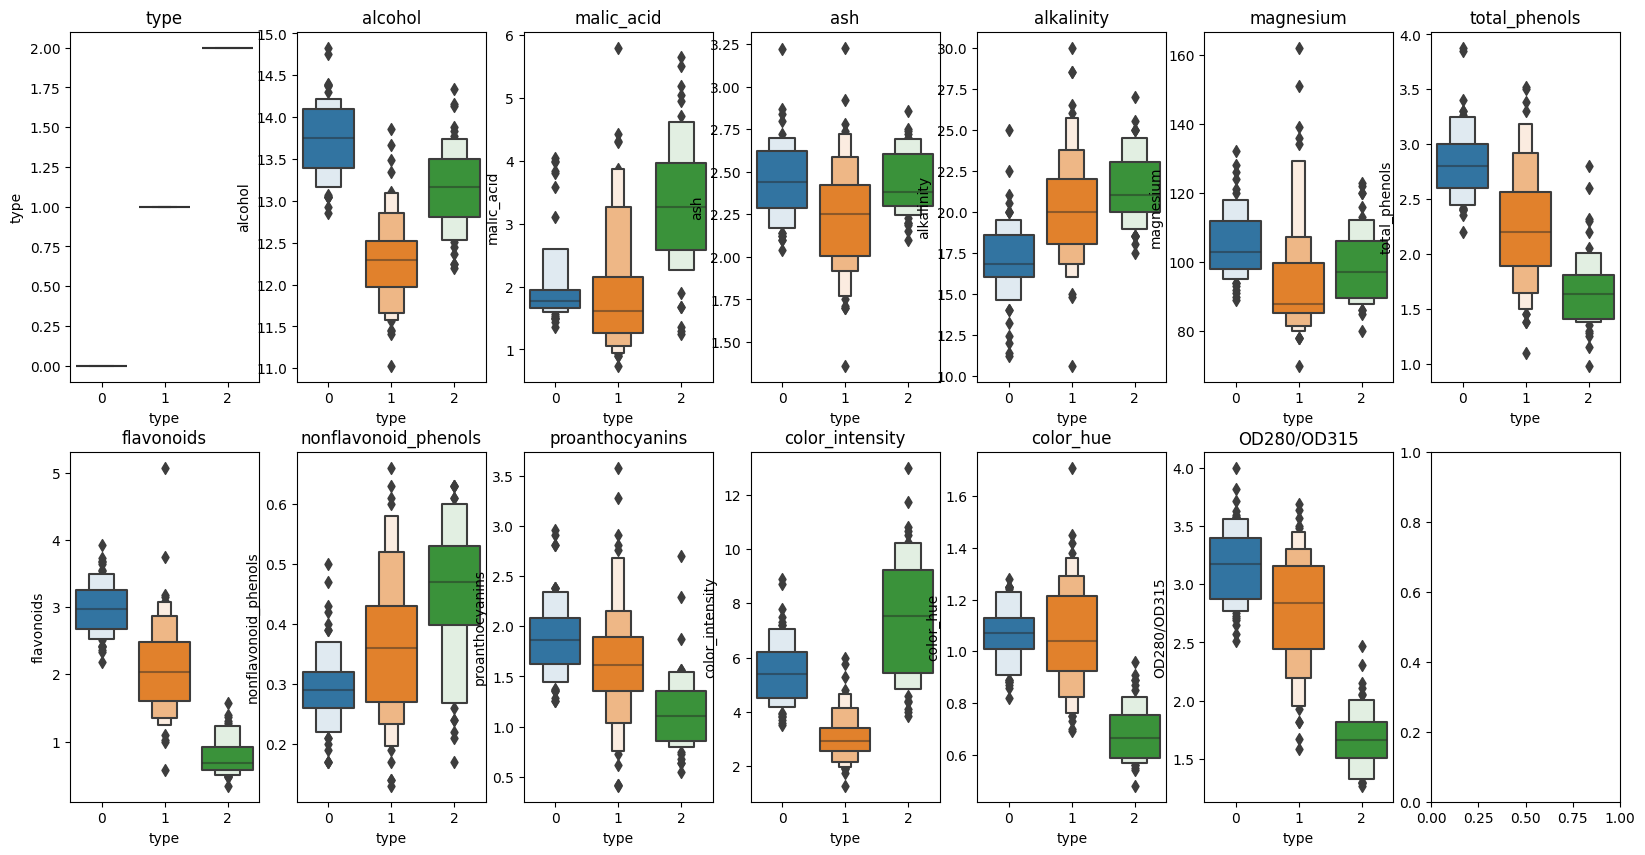

In [15]:
#use seaborn to plot the data for each feature in subplots
fig, axes = plt.subplots(2, 7, figsize=(20, 10))
for i, ax in enumerate(axes.flat):
    if i < len(df_wine.columns) - 1:
        sns.boxenplot(x='type', y=df_wine.columns[i], data=df_wine, ax=ax)
        ax.set_title(df_wine.columns[i])

### Scatter Plot

<div class="alert alert-block alert-success">
    
Teken een scatterplot die de ``color_hue`` uitzet tegenover de ``color_intensity``. Gebruik per wijnras (``type``) een andere kleur om de markers te tekenen. Wat is het verband tussen deze drie variabelen?

**TIP:** Gebruik hiervoor het ``hue`` attribuut van de ``pairplot`` functie uit Seaborn, of een ``groupby`` operatie uit Pandas voor een MatPlotLib-grafiek.

<AxesSubplot:xlabel='color_hue', ylabel='color_intensity'>

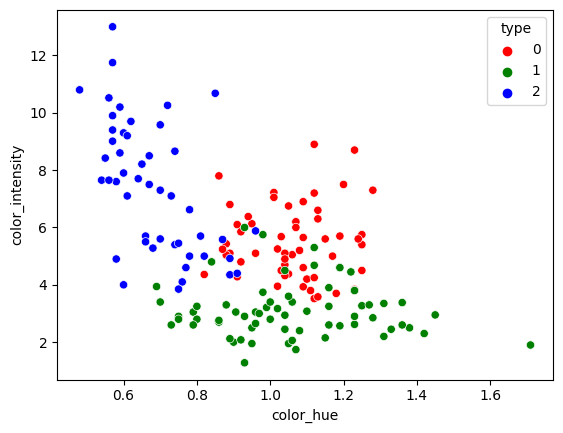

In [16]:
sns.scatterplot(x='color_hue', y='color_intensity', hue='type', data=df_wine, palette=['red', 'green', 'blue'])

### Correlation Plot

<div class="alert alert-block alert-success">
Teken een Pearson-correlatieplot van de dataset (zonder ``type``). Welke variabelen zijn het sterkst met elkaar gecorreleerd? Welke het minst? Kan je op basis van deze plot afleiden welke soort fenolen dominant zijn in wijn: flavonoïdische of niet-flavonoïdische?

**Tip:** Bereken eerst de correlatie-matrix met Pandas, en teken die vervolgens met een ``heatmap`` uit Seaborn.

<AxesSubplot:>

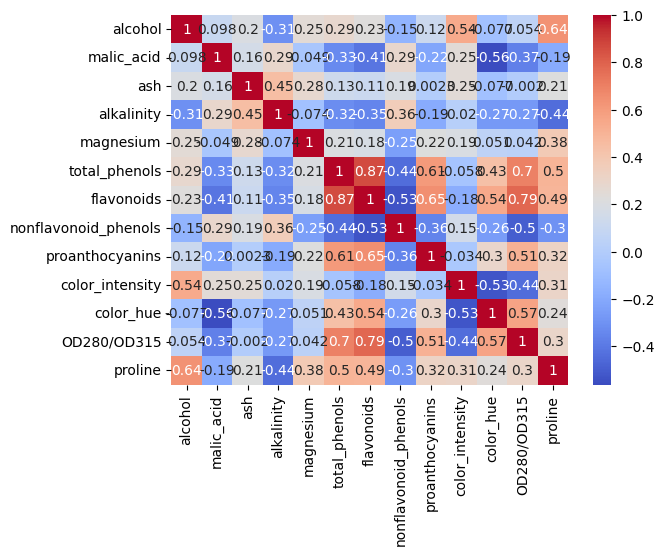

In [17]:
#pearson correlation plot without type
corr = df_wine.corr()
corr = corr.drop('type', axis=1)
corr = corr.drop('type', axis=0)
sns.heatmap(corr, annot=True, cmap='coolwarm')

### Distribution Plot

<div class="alert alert-block alert-success">
    
Plot een bivariate [*Kernel Density Estimation*](https://en.wikipedia.org/wiki/Multivariate_kernel_density_estimation) tussen ``alkalinity`` en ``proline`` voor elk ``type``.

**Tip**: Gebruik hiervoor ``jointplot`` uit Seaborn.

/home/pieterdn/Documents/Gitlab/labo-ml/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/pieterdn/Documents/Gitlab/labo-ml/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/pieterdn/Documents/Gitlab/labo-ml/venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will r

<AxesSubplot:xlabel='alkalinity', ylabel='proline'>

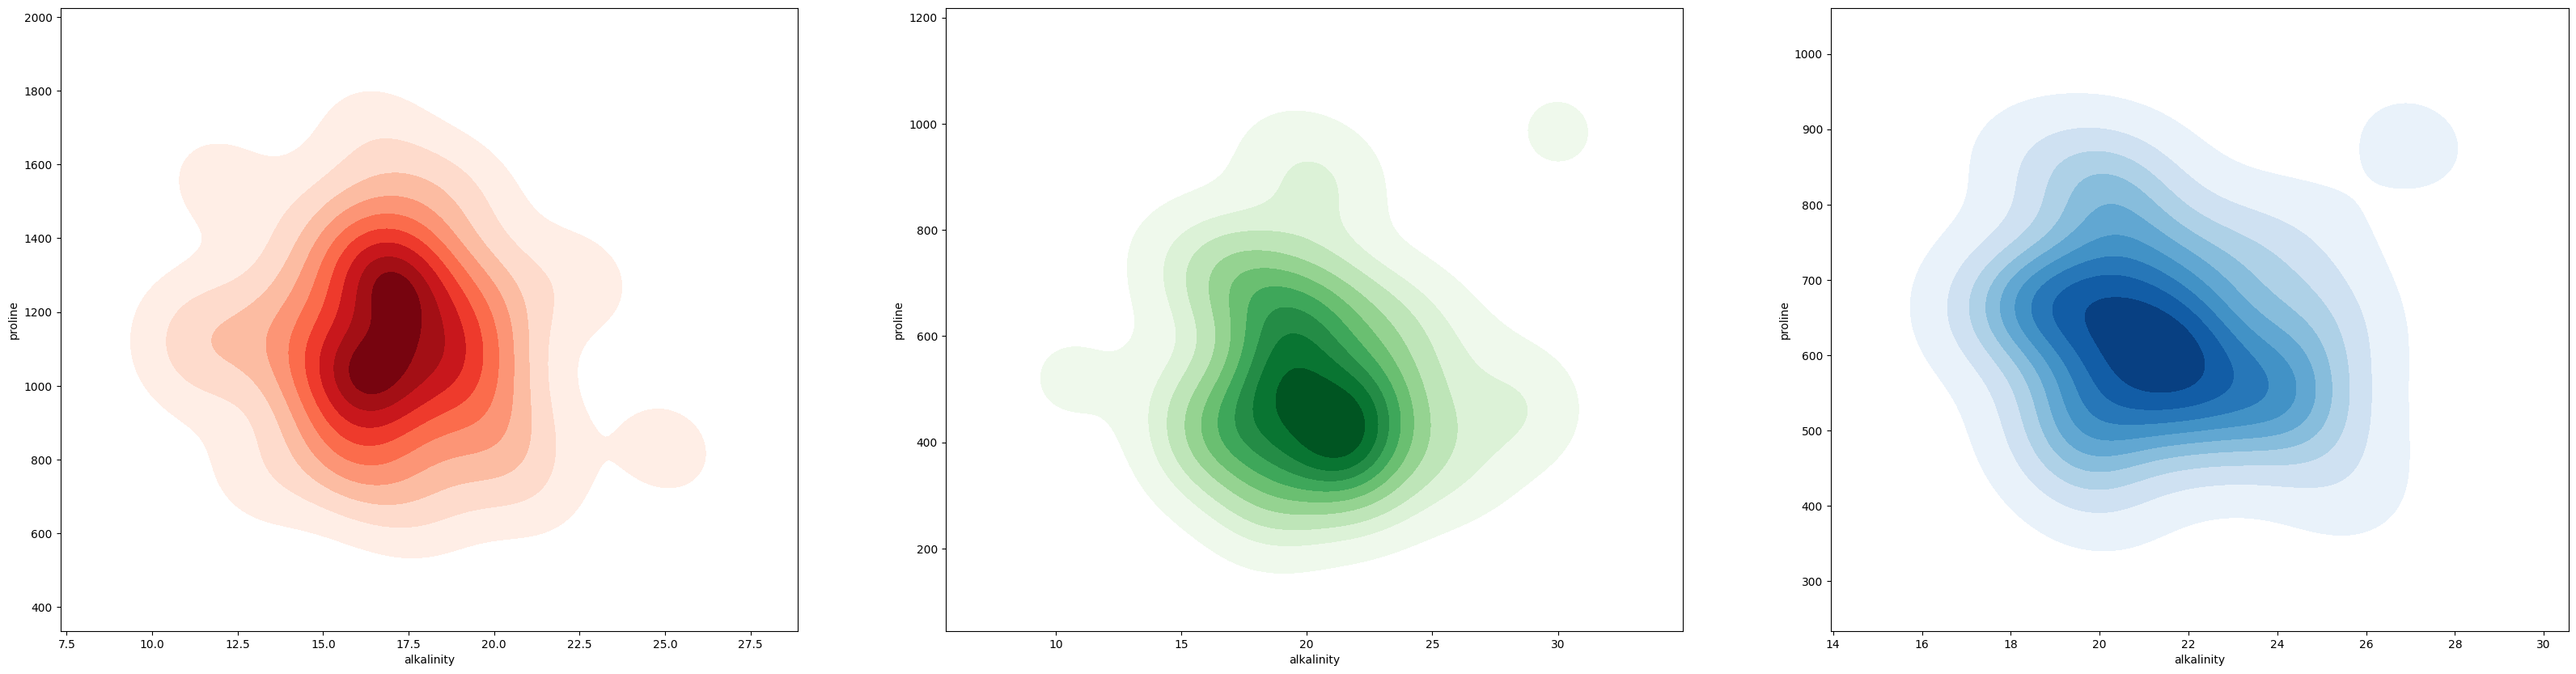

In [18]:
#plot kernel density estimation between alkalinaty and proline for each type in a 2x3 grid
fig, axes = plt.subplots(1, 3, figsize=(40, 10))
sns.kdeplot(df_wine['alkalinity'][df_wine['type'] == 0], df_wine['proline'][df_wine['type'] == 0], cmap="Reds", shade=True, thresh=0.05, ax=axes[0])
sns.kdeplot(df_wine['alkalinity'][df_wine['type'] == 1], df_wine['proline'][df_wine['type'] == 1], cmap="Greens", shade=True, thresh=0.05, ax=axes[1])
sns.kdeplot(df_wine['alkalinity'][df_wine['type'] == 2], df_wine['proline'][df_wine['type'] == 2], cmap="Blues", shade=True, thresh=0.05, ax=axes[2])
#sns.jointplot(x='alkalinity', y='proline', data=df_wine[df_wine['type'] == 0], kind='kde', color='red')
#sns.jointplot(x='alkalinity', y='proline', data=df_wine[df_wine['type'] == 1], kind='kde', color='green')
#sns.jointplot(x='alkalinity', y='proline', data=df_wine[df_wine['type'] == 2], kind='kde', color='blue')


## Modelling

In deze stap gaan we een aantal *machine learning* technieken bekijken waarmee we de dataset via een statistisch model met een zo laag mogelijke foutenmarge kunnen voorstellen. Deze modellen bevatten een verzameling aan *model parameters* die via een bepaald algoritme zo gefinetuned worden dat ze een combinatie van *inputs* (de features) in een *output* (de *target*) kunnen transformeren, en dat op een zo correct mogelijke manier.

De algoritmes zelf worden geïnitialiseerd via een reeks *hyperparameters*, die juist gekozen moeten worden om een hoge *model accuracy* te bekomen. Het tweaken van deze parameters is vaak een tijdrovend en delicaat proces. Een té goede keuze kan immers zorgen voor een goede *accuracy* op de data waarmee de training werd uitgevoerd, maar zorgt voor een zware terugval bij testen op het voor het model onbekende data. In zo'n geval is er sprake van *overfitting*.

[Scikit-learn](http://scikit-learn.org/stable/user_guide.html) (``sklearn``) is de populairste toolkit om aan *machine learning* te doen in Python. Deze library is enorm uitgebreid, en het uitproberen van alle functionaliteiten zou zeker te veel tijd kosten in dit labo. Bij de oefeningen staat er dan ook een directe verwijzing naar de juiste subpackage(s), zodat er weinig tijd wordt verloren met het doorlezen van de hele *user guide*.



### Tutorial: Dimensionality Reduction

Aangezien de dataset 13 verschillende features bevat, is het nogal moeilijk om deze allemaal tegelijk voor te stellen in één en dezelfde grafiek. Bij wijze van kennismaking met de Scikit-learn API gaan we de dimensies van de dataset reduceren van 13 naar 2, met een zo klein mogelijk verlies aan informatie. 

De techniek die we hiervoor gebruiken heet [*Principle Component Analysis*](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). Principieel is dit een lineaire projectie van de datapunten op een orthogonale ruimte met een lagere dimensie *n*. De assen van deze ruimte komen overeen met de eigenvectoren van de covariantie-matrix van de oorspronkelijke dataset die horen bij de *n* grootste eigenwaarden.

**Let op:** Vanaf nu gebruiken we de variabele ``df_wine`` uit [1.2.4](#Wrapping-into-Pandas-ML) voor de analyse!

In onderstaand voorbeeld worden zowel de pure Scikit-learn API als de wrapper-API van Pandas-ML voorgesteld. Aangezien onze data in ``DataFrame``-formaat bestaat en we de resultaten hiermee graag compatibel zouden zien, wordt al snel duidelijk dat de tweede aanpak heel wat eenvoudiger werkt. Wel is er van de eerstgenoemde API veel meer documentatie beschikbaar.

De keuze tussen het gebruik van pure Scikit-learn en Pandas-ML staat volledig vrij.

#### Pure Scikit-learn API

In [19]:
from sklearn.decomposition import PCA              ## import

pca = PCA(n_components=2)                          ## instantiation
pca.fit(df_wine.data)                              ## fit the PCA model with the data (excluding the target!!!)
df_wine_transformed = pca.transform(df_wine.data)  ## transform the data with the fitted PCA model
                                                   ## note: the two previous steps can be combined 
                                                   ## with fit_transform

df_wine_transformed[:5]                            ## results are in np.ndarray format

array([[ 3.05157578e+02, -5.00557340e+00],
       [ 4.40121895e+02, -6.06718718e+00],
       [ 7.35295644e+02,  8.87169648e-01],
       [-9.52962612e+00,  1.86160598e+01],
       [ 7.05287204e+02,  3.38542373e-01]])

#### Using Pandas-ML

In [20]:
pca = df_wine.decomposition.PCA(n_components=2)  ## import and instantiation
df_wine_transformed = df_wine.fit_transform(pca) ## fit and transform the data

df_wine_transformed.head()                       ## results are in DataFrame format

type           0          1
0     0  305.157578  -5.005573
1     0  440.121895  -6.067187
2     0  735.295644   0.887170
3     0   -9.529626  18.616060
4     0  705.287204   0.338542

<div class="alert alert-block alert-success">
    
Teken een scatterplot voor de *components* zoals eerder, maar nu voor `df_wine_transformed`.

**Vraag**: Kan op basis van deze gereduceerde features nog een duidelijk onderscheid tussen de klassen gemaakt worden?

<AxesSubplot:xlabel='0', ylabel='1'>

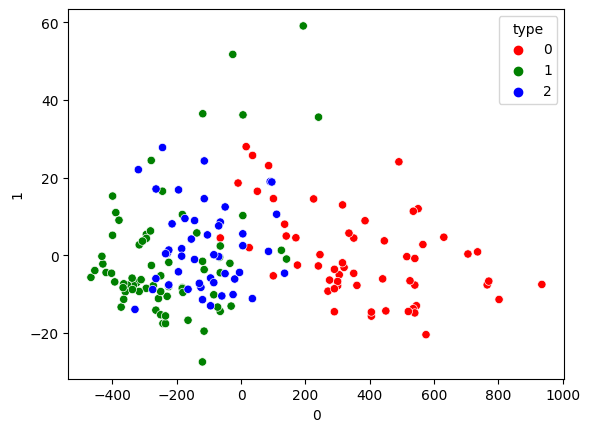

In [21]:
sns.scatterplot(x=df_wine_transformed[0], y=df_wine_transformed[1], hue=df_wine.target, palette=['red', 'green', 'blue'])

### Tutorial 2: Feature Scaling

Zoals beloofd in hoofdstuk [1.2.3](http://localhost:8888/notebooks/labo1.ipynb#Scaling) wordt de hele dataset eerst nog gescaled voor we er modellen mee gaan trainen. Hiervoor gebruiken we de ``MinMaxScaler`` uit [``sklearn.preprocessing``](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing). De werking hiervan gebeurt op bijna exact dezelfde manier als in de formule uit 1.2.3. 

In [29]:
#scale the data
from sklearn.preprocessing import MinMaxScaler
#disable dataconversion warning
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)

target = df_wine['type']
scaler = MinMaxScaler()
scaler.fit(df_wine)
df_wine_scaled = scaler.transform(df_wine)
df_wine_scaled = pdml.ModelFrame(df_wine_scaled, columns=df_wine.columns, target='type')
df_wine_scaled['type'] = target

df_wine_scaled.head()
df_wine.head()

type  alcohol  malic_acid   ash  alkalinity  magnesium  total_phenols  \
0     0    13.20        1.78  2.14        11.2        100           2.65   
1     0    13.16        2.36  2.67        18.6        101           2.80   
2     0    14.37        1.95  2.50        16.8        113           3.85   
3     0    13.24        2.59  2.87        21.0        118           2.80   
4     0    14.20        1.76  2.45        15.2        112           3.27   

   flavonoids  nonflavonoid_phenols  proanthocyanins  color_intensity  \
0        2.76                  0.26             1.28             4.38   
1        3.24                  0.30             2.81             5.68   
2        3.49                  0.24             2.18             7.80   
3        2.69                  0.39             1.82             4.32   
4        3.39                  0.34             1.97             6.75   

   color_hue  OD280/OD315  proline  
0       1.05         3.40     1050  
1       1.03         3.17     1185  
2       0.86         3.45     1480  
3       1.04         2.93      735  
4       1.05         2.85     1450

<div class="alert alert-block alert-success">
    
Bereken de PCA van daarnet opnieuw, en teken ook de scatterplot hiervan. Is de conclusie uit de vorige opgave nog steeds geldig?

<AxesSubplot:xlabel='0', ylabel='1'>

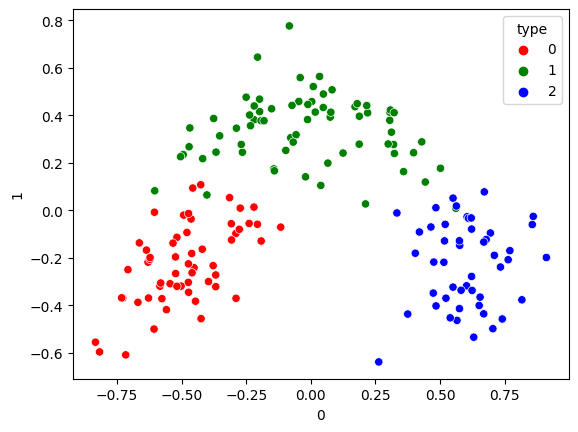

In [23]:
pca = df_wine_scaled.decomposition.PCA(n_components=2)  ## import and instantiation
df_wine_scaled_transformed = df_wine_scaled.fit_transform(pca) ## fit and transform the data

df_wine_scaled_transformed.head()  

sns.scatterplot(x=df_wine_scaled_transformed[0], y=df_wine_scaled_transformed[1], hue=df_wine_scaled.target, palette=['red', 'green', 'blue'])
#de classen zijn zelfs beter te onderscheiden

In [24]:
type(df_wine_scaled_transformed)

pandas_ml.core.frame.ModelFrame

### Train-Test Split

Zoals reeds aangehaald in de inleiding van dit hoofdstuk mogen we niet de hele dataset gebruiken om *machine learning models* te trainen wegens gevaar op *overfitting*. Via de ``train_test_split`` methode uit [``sklearn.model_selection``](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) kunnen we een deel van onze data afzonderen en pas later opnieuw gebruiken als testset wanneer we denken dat het model af is.

<div class="alert alert-block alert-success">
    
Splits de dataset op in twee delen met random geselecteerde datapunten: ``train_wine`` en ``test_wine``. De trainingset moet 70% van de originele data bevatten, de testset de overige 30%.

In [28]:
from sklearn.model_selection import train_test_split
train_wine, test_wine = train_test_split(df_wine_scaled_transformed.values, test_size=0.3)
train_data, train_labels = train_wine[:,(1,2)], train_wine[:,0]
test_data, test_labels = test_wine[:,(1,2)], test_wine[:,0]
train_data = pd.DataFrame(train_data)
df_wine_scaled_transformed


type         0         1
0       0 -0.492061 -0.020960
1       0 -0.523677 -0.196954
2       0 -0.817630 -0.597040
3       0 -0.206647 -0.059486
4       0 -0.606817 -0.500836
5       0 -0.544585 -0.309855
6       0 -0.474078 -0.304149
7       0 -0.502065 -0.319767
8       0 -0.630153 -0.219002
9       0 -0.727797 -0.370201
10      0 -0.377986 -0.233645
11      0 -0.451855 -0.242387
12      0 -0.628184 -0.370092
13      0 -0.833609 -0.556071
14      0 -0.472998 -0.345876
15      0 -0.424806 -0.456875
16      0 -0.367809 -0.322267
17      0 -0.716465 -0.609527
18      0 -0.460989 -0.182489
19      0 -0.663685 -0.137813
20      0 -0.273096  0.008554
21      0 -0.605215 -0.008679
22      0 -0.426014  0.107063
23      0 -0.456937  0.093194
24      0 -0.219985  0.012886
25      0 -0.420169 -0.164487
26      0 -0.289921 -0.098109
27      0 -0.479396 -0.093986
28      0 -0.518223 -0.114349
29      0 -0.523138 -0.267039
..    ...       ...       ...
145     2  0.603030 -0.318618
146     2  0.655329 -0.366310
147     2  0.523231 -0.370777
148     2  0.550558 -0.324171
149     2  0.404500 -0.181354
150     2  0.669470 -0.436748
151     2  0.622475 -0.079741
152     2  0.817197 -0.377614
153     2  0.651892 -0.401470
154     2  0.710585 -0.190255
155     2  0.263183 -0.639215
156     2  0.375380 -0.437613
157     2  0.669703 -0.134343
158     2  0.515194 -0.219420
159     2  0.621229 -0.032765
160     2  0.575480 -0.128998
161     2  0.624365 -0.338095
162     2  0.764052 -0.208666
163     2  0.565991 -0.464215
164     2  0.622489 -0.279210
165     2  0.474062 -0.349273
166     2  0.484884 -0.403398
167     2  0.671655  0.077087
168     2  0.770731 -0.170451
169     2  0.539673 -0.453534
170     2  0.741237 -0.458353
171     2  0.581905 -0.337303
172     2  0.630846 -0.535047
173     2  0.575518 -0.414687
174     2  0.704882 -0.499225

[175 rows x 3 columns]

### Decision Tree

Het eerste algoritme dat we zullen bekijken is de *decision tree* uit [``sklearn.tree``](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree). In zo'n model wordt stelselmatig een boomstructuur opgesteld waar in elke *node* de data opgesplitst wordt op basis van de waarde van één van de features. De trainingsmethode probeert deze *splits* zodanig te optimaliseren dat de *leafs* enkel datapunten van één bepaalde klasse bevatten.

Bij deze methode is het aantal te leren parameters niet op voorhand vastgelegd, aangezien dit afhangt van de grootte en complexiteit van de dataset. Paradoxaal genoeg worden zulke algoritmes *niet-parametrisch* genoemd, ook al kunnen ze soms veel meer parameters bevatten dan *parametrische* algoritmes.

<div class="alert alert-block alert-success">
    
Genereer een decision tree classifier op basis van ``train_wine`` die de data classificeert volgens wijntype. Noem het resultaat ``clf_tree``. Teken deze vervolgens met ``graphviz`` (zie User Guide).

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

# genereer
tree = DecisionTreeClassifier(random_state=0, max_depth=3)
clf_tree = tree.fit(train_wine[:,(1,2)], train_wine[:,(0)])
clf_tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [27]:
# teken
dot_data = export_graphviz(clf_tree, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("wine")

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

<div class="alert alert-block alert-success">
    
**Vraag:** Voer de training van de decision tree opnieuw uit, maar vervang ``train_wine`` telkens door ``train_wine.inverse_transform(scaler)`` (de originele, niet-gescalede waarden). Teken ook de boom opnieuw.
Wat valt op? Welke van de twee bomen zou je het liefst gebruiken als classifier?

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_data)
clf_tree2 = tree.fit(scaler.inverse_transform(train_data), train_labels)
dot_data2 = export_graphviz(clf_tree2, out_file=None)
graph2 = graphviz.Source(dot_data2)
graph2.render("wine2")

#evaluate both trees
from sklearn.metrics import accuracy_score
print("Accuracy of tree 1: ", accuracy_score(test_labels, clf_tree.predict(test_data)))
print("Accuracy of tree 2: ", accuracy_score(test_labels, clf_tree2.predict(test_data)))

Accuracy of tree 1:  0.33962264150943394
Accuracy of tree 2:  0.33962264150943394


Ik doe wrs iets fout want de bomen zijn gwn los hetzelfde met andere getallen

### Support Vector Machine

De Support Vector Machine (SVM) uit [``sklearn.svm``](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm) is het tweede algoritme dat we gaan bekijken. Een SVM construeert een [*hyperplane*](https://en.wikipedia.org/wiki/Hyperplane) dat de klassen van elkaar scheidt. De kracht van de SVM zit in het optimalisatiemechanisme, waarbij de *margin*, de afstand tussen het hyperplane en het dichtsbijliggende datapunt van elke klasse, gemaximaliseerd wordt. In het geval dat er meer dan twee klassen zijn, wordt er voor elke twee klassen een aparte SVM getraind (in totaal ``n * (n-1) / 2`` modellen); voor het eindresultaat worden de scores hiervan gecombineerd.

<div class="alert alert-block alert-success">
    
Genereer een SVM op basis van ``train_wine`` die de data classificeert volgens wijntype. Noem het resultaat ``clf_svm``.

In [ ]:
from sklearn.svm import SVC
clf_svm = SVC(gamma='auto')
clf_svm.fit(train_data, train_labels)
print("Accuracy of SVM: ", accuracy_score(test_labels, clf_svm.predict(test_data)))

Accuracy of SVM:  0.9811320754716981


### Multilayer Perceptron

De laatste classifier die onderzocht wordt komt uit de familie van *neurale netwerken*. Het Multilayer Perceptron (MLP) is een netwerk dat bestaat uit een *input layer* en een *output layer*, met daartussen een aantal *hidden layers* die elk een aantal *nodes* bevatten. In elke *node* worden de waarden uit alle nodes van de vorige layer samen met een *bias* lineair gecombineerd en vervolgens door een niet-lineaire *activatiefunctie* gehaald. Door de parameters van deze lineaire combinaties te trainen op de dataset, kan dit netwerk een niet-lineaire functie vormen die de dataset-mapping van features naar target heel dicht benadert. Een nadeel van deze techniek is wel dat er relatief veel trainingsdata moet zijn om tot een acceptabel resultaat te komen.

<img src="http://scikit-learn.org/stable/_images/multilayerperceptron_network.png" alt="MLP Structure" width=300/>

De [``sklearn.neural_network``](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.neural_network) module bevat enkele klassen om met MLPs te werken. 

<div class="alert alert-block alert-success">
    
Creëer een multilayer perceptron op basis van ``train_wine`` die de data classificeert volgens wijntype. Noem het resultaat ``clf_mlp``. Gebruik ``'lbfgs'`` en zet het maximum aantal trainingsiteraties op 20000. Maak gebruik van de volgende structuur voor de hidden layers:
* hidden layer 1: 20 nodes
* hidden layer 2: 15 nodes
* hidden layer 3: 10 nodes
* hidden layer 4: 5 nodes

In [ ]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(hidden_layer_sizes=(20, 15, 10, 5), max_iter=20000)
clf_mlp.fit(train_data, train_labels)
print("#Trained weights: ", sum(map(lambda x: x.size, clf_mlp.coefs_)))
print("Accuracy of MLP: ", accuracy_score(test_labels, clf_mlp.predict(test_data)))

#Trained weights:  555
Accuracy of MLP:  0.9811320754716981


<div class="alert alert-block alert-success">
    
**Vraag:** Wat is het totaal aantal *weights* of parameters dat door dit netwerk getraind moet worden (exclusief biases)?

In [ ]:
#zie (output van) code hierboven

## Cross-Validation

Nu we onze modellen gedefinieerd hebben, willen we uiteraard ook graag weten hoe goed ze presteren voordat we ze uiteindelijk loslaten op onze échte testdata. Er is echter een groot probleem: we hebben geen extra data meer over om deze tussentijdse test uit te voeren! We hadden deze uiteraard eerder kunnen afsplitsen van de trainingset, maar dan zou die laatste voor de algoritmes wel héél klein geworden zijn om performante modellen te genereren.

De oplossing vinden we onder de vorm van *cross validation*. Bij deze techniek wordt de trainingsset niet één, maar meerdere keren opgesplitst in een (kleinere) training- en validatieset. Bij elk van deze splitsingen wordt de *accuracy score* van het model berekend, en het gemiddelde van deze scores vormt dan de *cross validation score*. Deze score blijkt in de meeste gevallen vrij representatief te zijn voor de uiteindelijke performance op de testset, en door het gebruik van de splitsingen is er geen extra data nodig om testen te doen.

In [``sklearn.model_selection``](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) vinden we de ``cross_val_score`` functie terug, samen met een aantal *splitters*. 

<div class="alert alert-block alert-success">
    
* Maak een ``ShuffleSplit`` object aan met 10 splits.
* Bereken de *cross validation score* voor de drie modellen, gebruikmakend van die ``ShuffleSplit``.

**Vraag**: Welk model presteert het best?

In [ ]:
from sklearn.model_selection import cross_val_score
# ShuffleSplit
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.3)

In [ ]:
# cross_val_score with shuffle split
tree_scores = cross_val_score(clf_tree, train_data, train_labels, cv=cv)
svm_scores = cross_val_score(clf_svm, train_data, train_labels, cv=cv)
mlp_scores = cross_val_score(clf_mlp, train_data, train_labels, cv=cv)


print("Accuracy of tree: %0.2f (+/- %0.2f)" % (tree_scores.mean(), tree_scores.std() * 2))
print("Accuracy of SVM: %0.2f (+/- %0.2f)" % (svm_scores.mean(), svm_scores.std() * 2))
print("Accuracy of MLP: %0.2f (+/- %0.2f)" % (mlp_scores.mean(), mlp_scores.std() * 2))


Accuracy of tree: 0.95 (+/- 0.06)
Accuracy of SVM: 0.96 (+/- 0.06)
Accuracy of MLP: 0.98 (+/- 0.04)


## Prediction and Performance

*Finally, the big moment has arrived!* Het is tijd om de testdata erbij te halen en te kijken hoe goed (of hoe slecht) onze modellen het doen op onbekende data. [``sklearn.metrics``](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) bevat een groot aantal methodes om de *performance* van een model numeriek of grafisch voor te stellen.

<div class="alert alert-block alert-success">
    
Doe de volgende stappen voor elk van de drie modellen (hier ``clf`` genoemd):
1. Hertrain ``clf`` op de volledige trainingset (``train_wine``).
2. Ken ``clf`` toe aan het ``estimator`` attribuut van ``test_wine`` (enkel van toepassing bij gebruik van Pandas-ML API).
3. Bereken de ``accuracy_score`` op ``test_wine`` met de hertrainde ``clf``.
4. Print of teken de *confusion matrix* van ``test_wine``.

**Question:** Welke classifier presteert het beste op de testset? Komt dit overeen met de bevindingen uit de cross-validatiescores? Waardoor zou een mismatch tussen *accuracy score* en *cross validation score* kunnen onstaan?

In [ ]:
from sklearn.metrics import confusion_matrix

clf_tree = tree.fit(train_data, train_labels)
clf_svm = SVC(gamma='auto')
clf_svm.fit(train_data, train_labels)
clf_mlp = MLPClassifier(hidden_layer_sizes=(20, 15, 10, 5), max_iter=20000)
clf_mlp.fit(train_data, train_labels)

print("Accuracy of tree: ", accuracy_score(test_labels, clf_tree.predict(test_data)))
print("Accuracy of SVM: ", accuracy_score(test_labels, clf_svm.predict(test_data)))
print("Accuracy of MLP: ", accuracy_score(test_labels, clf_mlp.predict(test_data)))

#confusion matrix
print("Confusion matrix of tree: \n", confusion_matrix(test_labels, clf_tree.predict(test_data)))
print("Confusion matrix of SVM: \n", confusion_matrix(test_labels, clf_svm.predict(test_data)))
print("Confusion matrix of MLP: \n", confusion_matrix(test_labels, clf_mlp.predict(test_data)))


Accuracy of tree:  0.9433962264150944
Accuracy of SVM:  0.9811320754716981
Accuracy of MLP:  0.3018867924528302
Confusion matrix of tree: 
 [[23  0  0]
 [ 2 14  0]
 [ 0  1 13]]
Confusion matrix of SVM: 
 [[23  0  0]
 [ 1 15  0]
 [ 0  0 14]]
Confusion matrix of MLP: 
 [[ 0 23  0]
 [ 0 16  0]
 [ 0 14  0]]
